We compared the Diaper Awareness Week Campaign Data Set with the “All Accounts Without Transaction” data set and “Active Recurring Donations Dataset”

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

plt.style.use('seaborn-v0_8-paper')

In [78]:
week_opens = pd.read_csv("diaper_awareness_week_email_metrics_2020-20241116T215646Z-001\diaper_awareness_week_email_metrics_2020\diaper_need_awareness_week_opens.csv", parse_dates=['Last Open'], index_col=['Account ID'])

In [79]:
week_opens

,Email,Name,Opens,Last Open,Unnamed: 5
Account ID,,,,,
101,seth@kilterrewards.com,Seth Braddock,1,2020-09-23,NaN
102,ashleylocke24@gmail.com,Ashley Locke,4,2020-09-23,NaN
104,Shrrodgers@yahoo.com,Sharon Rodgers,2,2020-09-23,NaN
106,troy@vosseller.com,Troy Vosseller,1,2020-09-23,NaN
107,jettlie888@yahoo.com,Jonathan Ettlie,11,2020-09-24,NaN
...,...,...,...,...,...
46,becca@jssmadison.org,Rebecca Schwartz,23,2020-10-08,NaN
51,bsollenb@gmail.com,Brad Sollenberger,1,2020-09-23,NaN
53,lseidl-gafner@reachdane.org,Lisa Siedl-Gafner,15,2020-10-27,NaN


In [80]:
week_opens.columns

Index(['Email', 'Name', 'Opens', 'Last Open', 'Unnamed: 5'], dtype='object')

In [81]:
week_opens.drop(['Unnamed: 5'], axis = 1, inplace = True) # Drops the given column

In [82]:
week_opens.dtypes # Checks data type of each column

Email                object
Name                 object
Opens                 int64
Last Open    datetime64[ns]
dtype: object

In [83]:
week_opens.columns[week_opens.isna().any()].tolist() # Checks for columns with NaN

[]

In [84]:
week_opens.sort_values(by='Opens', ascending=False) # Sorts the data sets based on highest Open rates


,Email,Name,Opens,Last Open
Account ID,,,,
318,aenymann@outlook.com,Ann Nymann,31,2020-10-08
46,becca@jssmadison.org,Rebecca Schwartz,23,2020-10-08
15,jzboll@hotmail.com,Joan Boll,15,2020-09-23
53,lseidl-gafner@reachdane.org,Lisa Siedl-Gafner,15,2020-10-27
107,jettlie888@yahoo.com,Jonathan Ettlie,11,2020-09-24
...,...,...,...,...
378,wkkwagner@gmail.com,KIMBERLY WAGNER,1,2020-09-23
382,v.hokanson@gmail.com,Vicki Hokanson,1,2020-09-23
386,waunakeevet@tds.net,Karen Lange,1,2020-09-23


In [85]:
week_opens['Opens'].describe()

count    116.000000
mean       2.396552
std        4.049432
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       31.000000
Name: Opens, dtype: float64

Daiper Awareness Week Metrics

count    116.000000
mean       2.396552
std        4.049432
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       31.000000

In [86]:
week_opens["Email"].value_counts(dropna=False)

Email
seth@kilterrewards.com         1
ashleylocke24@gmail.com        1
Shrrodgers@yahoo.com           1
troy@vosseller.com             1
jettlie888@yahoo.com           1
                              ..
becca@jssmadison.org           1
bsollenb@gmail.com             1
lseidl-gafner@reachdane.org    1
brickdeeproots@gmail.com       1
kulaky@gmail.com               1
Name: count, Length: 116, dtype: int64

In [87]:
week_opens['Last Open'] = week_opens['Last Open'].dt.date # Removes the Hours, minutes, and seconds for column with dates


In [88]:
last_open = week_opens.groupby(week_opens['Last Open'])['Opens'].sum() # Counts the open rates for each date

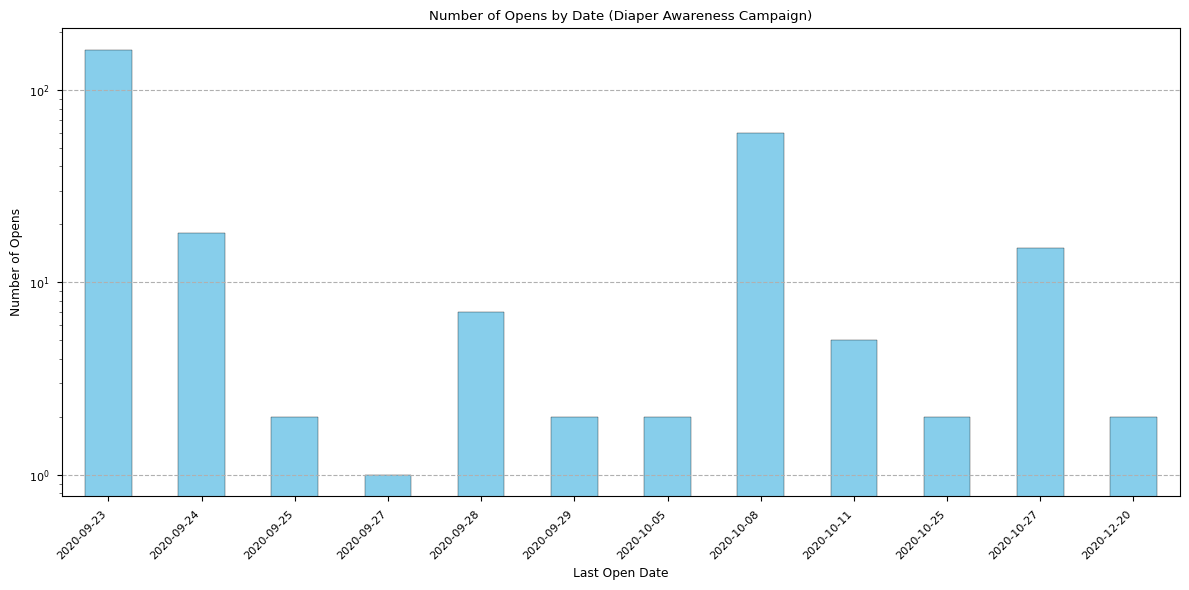

In [89]:
plt.figure(figsize=(12, 6))
last_open.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Opens by Date (Diaper Awareness Campaign)')
plt.xlabel('Last Open Date')
plt.ylabel('Number of Opens')
plt.yscale('log')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.grid(axis='y', linestyle='--')  # Optional: add a grid for better readability
plt.show()


In [90]:
last_open

Last Open
2020-09-23    162
2020-09-24     18
2020-09-25      2
2020-09-27      1
2020-09-28      7
2020-09-29      2
2020-10-05      2
2020-10-08     60
2020-10-11      5
2020-10-25      2
2020-10-27     15
2020-12-20      2
Name: Opens, dtype: int64

In [91]:
week_opens.to_csv('CleanedDonorDataSets/Week_Email_Metrics_Cleaned.csv', index = True)

In [92]:
no_transaction = pd.read_csv("DonorDataSets/all_account_without_transactions .csv", index_col=['Account ID'])

In [93]:
no_transaction.columns

Index(['Account Type', 'Full Name (F)', 'Company Name',
       'Full Street Address (F)', 'City', 'State/Province', 'Email 1',
       'All Donation Amount', 'All Order Amount', 'All Registration Amount',
       'Unnamed: 11'],
      dtype='object')

In [94]:
no_transaction.drop(['Unnamed: 11'], axis = 1, inplace=True)


In [95]:
no_transaction.columns[no_transaction.isna().any()].tolist()

['Full Name (F)',
 'Company Name',
 'Full Street Address (F)',
 'City',
 'State/Province',
 'Email 1']

In [96]:
no_transaction.isna().sum()

Account Type                0
Full Name (F)               1
Company Name               38
Full Street Address (F)    12
City                       12
State/Province             12
Email 1                     3
All Donation Amount         0
All Order Amount            0
All Registration Amount     0
dtype: int64

In [97]:
# Reset the index to treat Account ID as a column
df1_reset = week_opens.reset_index()
df2_reset = no_transaction.reset_index()

clicks_but_no_transaction = df1_reset[(df1_reset['Name'].isin(df2_reset['Full Name (F)']))]
clicks_but_no_transaction.set_index('Account ID')

print("Accounts in the Diaper Awareness Campaign who Opened the Links but haven't made Transaction")
clicks_but_no_transaction

Accounts in the Diaper Awareness Campaign who Opened the Links but haven't made Transaction


,Account ID,Email,Name,Opens,Last Open
6,111,Limeandnavy@gmail.com,Abby Ehringer,1,2020-09-23
17,140,Katielim16@gmail.com,Katie Lim,2,2020-09-24
19,146,natalieaz9@gmail.com,Natalie Meyer,1,2020-09-23
21,151,amyg123@gmail.com,Amy Bass,1,2020-09-23
22,152,gamine417@hotmail.com,Lisa Williams,3,2020-09-24
23,161,badgergirl712@uwalumni.com,Kristen Vale,1,2020-09-23
24,164,candyralston@sbcglobal.net,Candy Pangan,1,2020-09-23
25,166,claire.tomm@gmail.com,Claire Tomm,1,2020-09-23
26,168,roxglick@gmail.com,Roxanne Glick,2,2020-09-23
51,250,emensamie@gmail.com,Amie Conley,1,2020-09-23


Of the 116 people targeted by the diaper Awareness Campaign, 16 individuals have made no transactions at all when comparing with the “All Accounts Without Transaction” data set. These are the 16 users who got the links and even opened the links but haven’t made any transactions according to the ““All Accounts Without Transaction” data set.

Of the 116 people targeted by the diaper Awareness Campaign, 16 individuals have made no transactions at all when comparing with the “All Accounts Without Transaction” data set. These are the 16 users who got the links and even opened the links but haven’t made any transactions according to the ““All Accounts Without Transaction” data set.

In [98]:
clicks_but_no_transaction['Name'].size # checks number of individuals in the given column

16

In [99]:
week_opens['Name'].size

116

In [100]:
clicks_but_no_transaction['Opens'].describe()

count    16.000000
mean      2.750000
std       5.446712
min       1.000000
25%       1.000000
50%       1.000000
75%       2.000000
max      23.000000
Name: Opens, dtype: float64

Clicks But No Donation

count    16.000000
mean      2.750000
std       5.446712
min       1.000000
25%       1.000000
50%       1.000000
75%       2.000000
max      23.000000


In [101]:
clicks_with_transaction = df1_reset[~(df1_reset['Name'].isin(df2_reset['Full Name (F)']))]
clicks_with_transaction.set_index('Account ID', inplace=True)

In [102]:
print('Clicks With Transaction')
clicks_with_transaction.sort_values(by= 'Opens', ascending=False)

Clicks With Transaction


,Email,Name,Opens,Last Open
Account ID,,,,
318,aenymann@outlook.com,Ann Nymann,31,2020-10-08
15,jzboll@hotmail.com,Joan Boll,15,2020-09-23
53,lseidl-gafner@reachdane.org,Lisa Siedl-Gafner,15,2020-10-27
107,jettlie888@yahoo.com,Jonathan Ettlie,11,2020-09-24
345,gandkcherry@outlook.com,Kathy Cherry,8,2020-09-23
...,...,...,...,...
381,breunigkasey@gmail.com,Kasey Breunig,1,2020-10-05
386,waunakeevet@tds.net,Karen Lange,1,2020-09-23
382,v.hokanson@gmail.com,Vicki Hokanson,1,2020-09-23



100 of the remaining individuals have made some form of donation before; however, we can not conclude the causality from this to establish the effectiveness of the diaper awareness campaign. For that, we were hoping to tally the date when the link was last clicked and compare that date  with the All Donors data set; however, the all donor data set has no timestamp; so there is no way of knowing if these 100 donors were affected by the diaper awareness campaign.

In [103]:
clicks_with_transaction['Name'].size

100

In [104]:
clicks_with_transaction['Opens'].describe()

count    100.000000
mean       2.340000
std        3.811784
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       31.000000
Name: Opens, dtype: float64

Clicks With Transactions

count    100.000000
mean       2.340000
std        3.811784
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       31.000000

In [105]:
clicks_with_transaction

,Email,Name,Opens,Last Open
Account ID,,,,
101,seth@kilterrewards.com,Seth Braddock,1,2020-09-23
102,ashleylocke24@gmail.com,Ashley Locke,4,2020-09-23
104,Shrrodgers@yahoo.com,Sharon Rodgers,2,2020-09-23
106,troy@vosseller.com,Troy Vosseller,1,2020-09-23
107,jettlie888@yahoo.com,Jonathan Ettlie,11,2020-09-24
...,...,...,...,...
387,bnoel@nbc15.com,BECKI NOEL,2,2020-09-23
51,bsollenb@gmail.com,Brad Sollenberger,1,2020-09-23
53,lseidl-gafner@reachdane.org,Lisa Siedl-Gafner,15,2020-10-27


In [106]:
recurringData = pd.read_csv("CleanedDonorDataSets/recurringDataCleaned.csv", index_col=['Account ID'])

In [107]:
recurringData.head(10)

,Recurring Donation ID,Recurring Donation Amount,Recurring Donation Interval,Recurring Donation Next Payment Date,Total Amount,Donation Count,Full Name (F)
Account ID,,,,,,,
78,43,200.0,1,10/23/2024,4000.00,20,Donna Sollenberger
2632,30,100.0,1,11/10/2024,3522.40,34,William Janson
2505,53,100.0,1,11/12/2024,207.20,2,Chris & Amy Guthrie
5853,45,100.0,1,11/19/2024,1431.78,14,Barbara Ingham
1175,49,100.0,1,11/22/2024,942.21,9,Jenny Badreddine
2505,27,100.0,1,11/12/2024,3729.60,36,Chris & Amy Guthrie
2849,34,75.0,3,11/20/2024,856.46,11,Susan Lutter
2507,26,50.0,1,11/21/2024,2310.00,44,Elizabeth Ireland
2613,29,50.0,1,11/12/2024,1820.35,35,Amanda Weppler Ansel


In [108]:
recurring_from_clicks = recurringData[(recurringData['Full Name (F)'].isin(clicks_with_transaction['Name']))]

print('Recurring Donors from the Diaper Awareness Campaign')
recurring_from_clicks

Recurring Donors from the Diaper Awareness Campaign


,Recurring Donation ID,Recurring Donation Amount,Recurring Donation Interval,Recurring Donation Next Payment Date,Total Amount,Donation Count,Full Name (F)
Account ID,,,,,,,
78,43,200.0,1,10/23/2024,4000.00,20,Donna Sollenberger
316,8,25.0,1,11/10/2024,1275.00,51,Holly Lyon
225,28,25.0,1,11/07/2024,914.55,35,Amanda Stein
102,1,12.0,1,11/11/2024,804.00,67,Ashley Locke
321,9,12.0,1,11/10/2024,682.38,51,Lisa Olmsted
337,11,12.0,1,11/11/2024,648.21,51,Jonathon Vinje


Among the 100 donors who have made transactions and were targeted by the awareness campaign, 6 of the individuals were identified as recurring donors with some of the highest donations amounts in the past.

However, without a timestamp to compare when the donations were actually made in reference to the Diaper Awareness Data set, it remains unclear if their continued contributions were influenced by the campaign.


In [163]:
recurring_from_clicks['Full Name (F)']


Account ID
78     Donna Sollenberger
316            Holly Lyon
225          Amanda Stein
102          Ashley Locke
321          Lisa Olmsted
337        Jonathon Vinje
Name: Full Name (F), dtype: object

In [162]:
recurring_from_clicks["Total Amount"].describe()

count       6.000000
mean     1387.356667
std      1299.669977
min       648.210000
25%       712.785000
50%       859.275000
75%      1184.887500
max      4000.000000
Name: Total Amount, dtype: float64

In [110]:
recurring_from_clicks["Total Amount"].sum()

np.float64(8324.14)

In [111]:
allDonorsClean = pd.read_csv('CleanedDonorDataSets/allDonorsClean.csv',index_col=['Account ID'])

In [112]:
df3_reset = allDonorsClean.reset_index()
df4_reset = no_transaction.reset_index()

irregularity = df3_reset[(df3_reset['Full Name (F)'].isin(df4_reset['Full Name (F)']))] # Checks for overlap between data sets


In [113]:
irregularity.set_index('Account ID')

,Account Type,Full Name (F),Company Name,City,State/Province,Zip Code,Largest Donation Amount
Account ID,,,,,,,
4286,Individual,Megan Sollenberger,Epic,Verona,WI,53593,10000.00
346,Individual,Megan Sollenberger,DCDB,Verona,WI,53593,12.67
4295,Individual,Megan Sollenberger,Roots & Wings Foundation,Madison,WI,53718,30000.00
4298,Individual,Megan Sollenberger,Madison Gas & Electric,Madison,WI,53718,5000.00
4300,Individual,Megan Sollenberger,CI Pediatric Therapy Centers,Madison,WI,53718,1000.00


There is an irregularity we noticed. The individual named Megan with Account ID 346 appears both in the “All Accounts Without Transaction” data set and “All Donors” data set and has made previous donation.

In [114]:
allDonorsClean = pd.read_csv("CleanedDonorDataSets/allDonorsClean.csv")

In [115]:
allDonorsClean.columns

Index(['Account ID', 'Account Type', 'Full Name (F)', 'Company Name', 'City',
       'State/Province', 'Zip Code', 'Largest Donation Amount'],
      dtype='object')

In [116]:
count = len(allDonorsClean[allDonorsClean["Full Name (F)"] == "Donna Sollenberger" ])
count

2

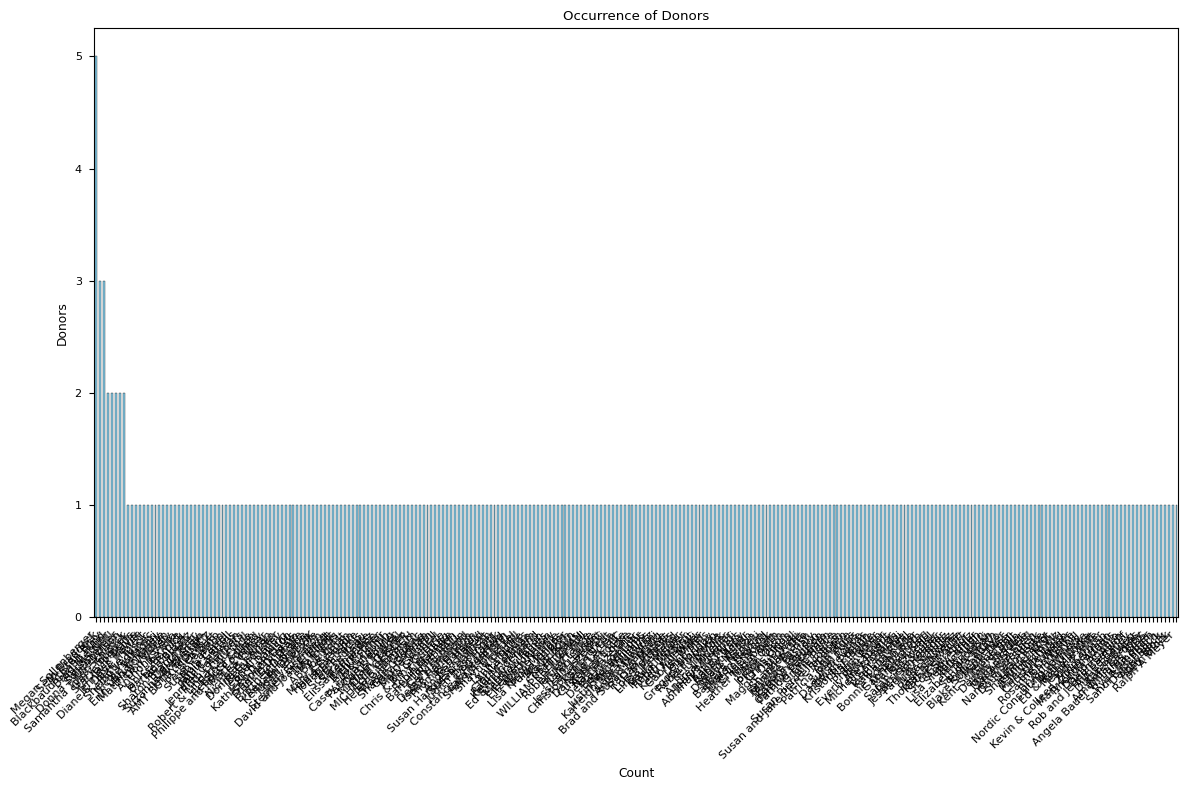

In [117]:
count = allDonorsClean["Full Name (F)"].value_counts()
plt.figure(figsize=(12, 8))
count.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Occurrence of Donors')
plt.xlabel('Count')
plt.ylabel('Donors')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [118]:
clicks_with_transaction['Name'].value_counts()

Name
Seth Braddock        3
Ashley Locke         1
Sharon Rodgers       1
Troy Vosseller       1
Jonathan Ettlie      1
                    ..
BECKI NOEL           1
Brad Sollenberger    1
Lisa Siedl-Gafner    1
Linda Brick          1
Patricia Garbarra    1
Name: count, Length: 98, dtype: int64

In [119]:
# Create composite keys for matching
allDonorsClean['composite_key'] = allDonorsClean['Full Name (F)'] + '_' + allDonorsClean['Account ID'].astype(str)
clicks_with_transaction['composite_key'] = clicks_with_transaction['Name'] + '_' + clicks_with_transaction.index.astype(str)

# Filter rows based on matching composite keys
campaignDonorsInAllDonors = allDonorsClean[
    allDonorsClean['composite_key'].isin(clicks_with_transaction['composite_key'])
]

print('Donors from the Diaper Awareness Campaign in All Donors Data Set')
campaignDonorsInAllDonors

Donors from the Diaper Awareness Campaign in All Donors Data Set


C:\Users\prate\AppData\Local\Temp\ipykernel_15260\3442036929.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clicks_with_transaction['composite_key'] = clicks_with_transaction['Name'] + '_' + clicks_with_transaction.index.astype(str)


,Account ID,Account Type,Full Name (F),Company Name,City,State/Province,Zip Code,Largest Donation Amount,composite_key
22,132,Individual,Seth Braddock,Kilter Rewards,Madison,WI,53703,30.00,Seth Braddock_132
23,101,Individual,Seth Braddock,Kilter Rewards,Atlanta,GA,30308,58.00,Seth Braddock_101
24,120,Individual,Seth Braddock,Kilter Rewards,Madison,WI,53703-6515,595.46,Seth Braddock_120
54,233,Individual,Frankie Dharam,Epic,Madison,WI,53711,100.00,Frankie Dharam_233
113,227,Individual,Vicki Hill,Nordic,Madison,WI,53726,206.90,Vicki Hill_227
122,301,Individual,Elizabeth Kelsey,Ms,Fitchburg,WI,53711,50.00,Elizabeth Kelsey_301
133,386,Individual,Karen Lange,WAUNAKEE VETERINARY SERVICES,Waunakee,WI,53597,51.80,Karen Lange_386
138,229,Individual,Danielle LeClair,Epic,Madison,WI,53713,25.00,Danielle LeClair_229
139,129,Individual,Custom Ink LLC,Custom Ink LLC,Fairfax,VA,22031,706.39,Custom Ink LLC_129
140,102,Individual,Ashley Locke,Salesforce,Cambridge,WI,53523,310.89,Ashley Locke_102


In [120]:
campaignDonorsInAllDonors["Largest Donation Amount"].sum()

np.float64(13830.06)

In [121]:

# Filter rows based on matching composite keys
campaignDonorsInAllDonors2 = clicks_with_transaction[
    clicks_with_transaction['composite_key'].isin(allDonorsClean['composite_key'])
]

print('Donors from the Diaper Awareness Campaign in All Donors Data Set')
campaignDonorsInAllDonors2

Donors from the Diaper Awareness Campaign in All Donors Data Set


,Email,Name,Opens,Last Open,composite_key
Account ID,,,,,
101,seth@kilterrewards.com,Seth Braddock,1,2020-09-23,Seth Braddock_101
102,ashleylocke24@gmail.com,Ashley Locke,4,2020-09-23,Ashley Locke_102
12,magarooski@gmail.com,Maggie Ostrowski,1,2020-09-23,Maggie Ostrowski_12
120,seth.braddock@kilterrewards.com,Seth Braddock,1,2020-09-23,Seth Braddock_120
129,laney@customink.com,Custom Ink LLC,2,2020-09-23,Custom Ink LLC_129
132,sethjbraddock@gmail.com,Seth Braddock,1,2020-09-23,Seth Braddock_132
142,krizal@reachdane.org,Kalpana Rizal,1,2020-09-23,Kalpana Rizal_142
174,pastorjulie@umcmh.org,Julie Wilson,6,2020-09-23,Julie Wilson_174
191,kchmiele@mac.com,Kelly Milewski,1,2020-09-23,Kelly Milewski_191


In [122]:
campaignDonorsInAllDonors["Full Name (F)"].size

20

Of the 100 people who clicked the links and have some form of transactions when compared to the "all accounts without transaction" dataset, only 20 of these donors were also found in the allDonors dataset. 18 of them are from Wisconsin. The summary of the largest donations made by these 20 donors is as follows:

count      20.00000
mean      691.50300
std      1488.96745
min        25.00000
25%        56.45000
50%       150.00000
75%       382.03250
max      5000.00000

Surprisingly, all of them are associated with companies and bring in 4.8 percent of the Largest Donations recorded in the "All Donors" dataset.

In [123]:
campaignDonorsInAllDonors['Largest Donation Amount'].describe()

count      20.00000
mean      691.50300
std      1488.96745
min        25.00000
25%        56.45000
50%       150.00000
75%       382.03250
max      5000.00000
Name: Largest Donation Amount, dtype: float64

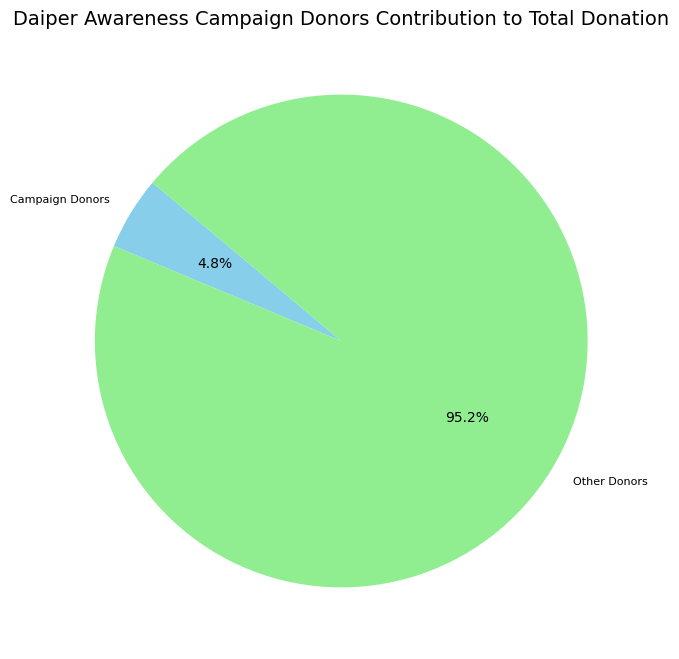

In [124]:
# Calculating the total donation amounts
campaign_total = campaignDonorsInAllDonors['Largest Donation Amount'].sum()
all_donors_total = allDonorsClean['Largest Donation Amount'].sum()

# Computing the proportions
proportions = [campaign_total, all_donors_total - campaign_total]
labels = ['Campaign Donors', 'Other Donors']

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(proportions, labels=labels, autopct='%1.1f%%', colors=['skyblue', 'lightgreen'], startangle=140)
plt.title("Daiper Awareness Campaign Donors Contribution to Total Donation", fontsize=14)
plt.show()

In [125]:
url_performance = pd.read_csv("diaper_awareness_week_email_metrics_2020-20241116T215646Z-001\diaper_awareness_week_email_metrics_2020\diaper_awareness_week_click_performance.csv")

In [126]:
url_performance.dtypes

URLs              object
Total Clicks       int64
Unique Clicks      int64
Unnamed: 3       float64
dtype: object

In [127]:
url_performance.drop(columns=["Unnamed: 3"], inplace=True)

In [128]:
url_performance.columns

Index(['URLs', 'Total Clicks', 'Unique Clicks'], dtype='object')

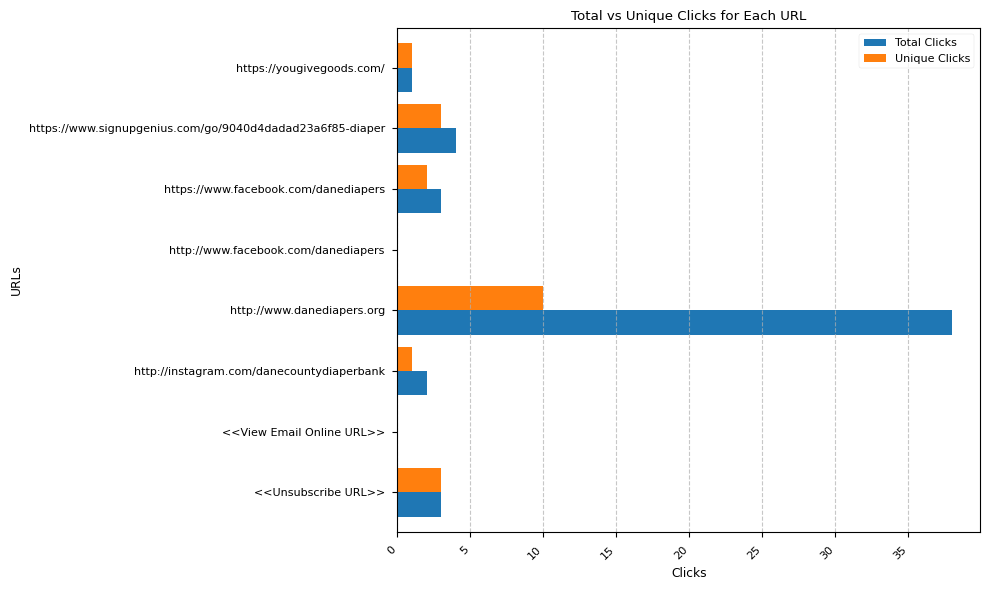

In [129]:
url_clicks = url_performance.groupby("URLs" , as_index=True ).sum()


url_clicks.plot(kind='barh', figsize=(10, 6), width=0.8)

# Adding title and labels
plt.title('Total vs Unique Clicks for Each URL')
plt.xlabel('Clicks')
plt.ylabel('URLs')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better clarity
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add grid lines for better readability
plt.tight_layout()

# Display the chart
plt.show()


In [160]:
url_clicks

,Total Clicks,Unique Clicks
URLs,,
<<Unsubscribe URL>>,3,3
<<View Email Online URL>>,0,0
http://instagram.com/danecountydiaperbank,2,1
http://www.danediapers.org,38,10
http://www.facebook.com/danediapers,0,0
https://www.facebook.com/danediapers,3,2
https://www.signupgenius.com/go/9040d4dadad23a6f85-diaper,4,3
https://yougivegoods.com/,1,1


In [130]:
clicks_with_transaction.loc[368]


Email            Joyce220@sbcglobal.net
Name                     JOYCE WILLIAMS
Opens                                 2
Last Open                    2020-09-23
composite_key        JOYCE WILLIAMS_368
Name: 368, dtype: object

In [131]:
clicks_with_transaction.loc[300]

Email            erika.s.poole@gmail.com
Name                         Erika Poole
Opens                                  2
Last Open                     2020-09-23
composite_key            Erika Poole_300
Name: 300, dtype: object

In [132]:
clicks_with_transaction.loc[129]

Email            laney@customink.com
Name                  Custom Ink LLC
Opens                              2
Last Open                 2020-09-23
composite_key     Custom Ink LLC_129
Name: 129, dtype: object

In [133]:
allDonors = pd.read_csv("DonorDataSets/all_donors.csv")

In [134]:
allDonors.set_index("Account ID", inplace=True)
allDonors.head(5)

,Account Type,Salutation,Full Name (F),Company Name,Address Line 1,City,State/Province,Zip Code,Largest Donation Amount,Unnamed: 10
Account ID,,,,,,,,,,
7458,Company,NaN,NaN,JLA Architects,800 West Broadway,Monona,WI,53713,"10,000.00",NaN
98,Company,NaN,NaN,Toot + Kate's Winebar,NaN,NaN,NaN,NaN,200.00,NaN
7610,Company,NaN,NaN,American Transmission Company,W234 N2000 Ridgeview Pkwy Ct.,Waukesha,WI,53187,50.00,NaN
7463,Company,NaN,NaN,Dental Health Associates of Madison LTD.,2971 Chapel Valley Rd.,Madison,WI,53711,"2,500.00",NaN
267,Company,NaN,NaN,American Family Insurance Dreams Foundation,NaN,NaN,NaN,NaN,150.00,NaN


In [135]:
allDonors.loc[368]

Account Type                      Individual
Salutation                               NaN
Full Name (F)                 JOYCE WILLIAMS
Company Name                             NaN
Address Line 1             3149 Stratton Way
City                                 Madison
State/Province                            WI
Zip Code                               53719
Largest Donation Amount                12.00
Unnamed: 10                              NaN
Name: 368, dtype: object

In [136]:
allDonors.loc[300]

Account Type                                 Individual
Salutation                                          NaN
Full Name (F)                               Erika Poole
Company Name                                        NaN
Address Line 1             3080 Yarmouth Greenway Drive
City                                          Fitchburg
State/Province                                       WI
Zip Code                                          53711
Largest Donation Amount                          100.00
Unnamed: 10                                         NaN
Name: 300, dtype: object

In [137]:
allDonors.loc[129]

Account Type                      Individual
Salutation                               NaN
Full Name (F)                 Custom Ink LLC
Company Name                  Custom Ink LLC
Address Line 1             2910 District Ave
City                                 Fairfax
State/Province                            VA
Zip Code                               22031
Largest Donation Amount               706.39
Unnamed: 10                              NaN
Name: 129, dtype: object

In [138]:
allDonors.loc[89]

Account Type               Individual
Salutation                        NaN
Full Name (F)              Eric Hohol
Company Name                   DuPont
Address Line 1                    NaN
City                              NaN
State/Province                    NaN
Zip Code                        53716
Largest Donation Amount         20.00
Unnamed: 10                       NaN
Name: 89, dtype: object

In [139]:
allDonors.loc[216]

Account Type                    Individual
Salutation                             NaN
Full Name (F)                Maureen Coyle
Company Name                           NaN
Address Line 1             2656 Fahey Glen
City                             Fitchburg
State/Province                          WI
Zip Code                             53711
Largest Donation Amount              75.00
Unnamed: 10                            NaN
Name: 216, dtype: object

In [140]:
allDonors[allDonors["Full Name (F)"] == "Sarah Egan"]

,Account Type,Salutation,Full Name (F),Company Name,Address Line 1,City,State/Province,Zip Code,Largest Donation Amount,Unnamed: 10
Account ID,,,,,,,,,,


In [141]:
# Access the rows with the specified indices and the 'Largest Donation Amount' column
donations = allDonors.loc[[216, 89, 129, 300, 368], 'Largest Donation Amount']

# Convert the 'Largest Donation Amount' to numeric values, coercing any errors (e.g., non-numeric values)
donations = pd.to_numeric(donations, errors='coerce')

# Calculate the total donation
total_donation = donations.sum()

# Print the donations and the total
print("Donations:")
print(donations)
print("\nTotal Donation:", total_donation)



Donations:
Account ID
216     75.00
89      20.00
129    706.39
300    100.00
368     12.00
Name: Largest Donation Amount, dtype: float64

Total Donation: 913.39


Total Donation Contribution by donors who otherwise unsubscribed or did not receive the daiper awareness campaign 

In [142]:
allDonors.columns


Index(['Account Type', 'Salutation', 'Full Name (F)', 'Company Name',
       'Address Line 1', 'City', 'State/Province', 'Zip Code',
       'Largest Donation Amount', 'Unnamed: 10'],
      dtype='object')

In [143]:
allDonorsClean

,Account ID,Account Type,Full Name (F),Company Name,City,State/Province,Zip Code,Largest Donation Amount,composite_key
0,177,Company,Nordic Consulting Partners,Nordic Consulting Partners,Madison,WI,53713,500.00,Nordic Consulting Partners _177
1,1598,Individual,Ralph A Meyer,Ralph A Meyer,Montfort,WI,53569,51.85,Ralph A Meyer_1598
2,6484,Individual,Robert Acker,Robert Acker,Waunakee,WI,53597,26.16,Robert Acker_6484
3,5935,Individual,Rhonda Adams,The River Food Pantry,Madison,WI,53718,250.00,Rhonda Adams_5935
4,398,Individual,David Aguero,St. Jude Children's Research Hospital,Memphis,TN,38117,26.06,David Aguero_398
...,...,...,...,...,...,...,...,...,...
283,4980,Individual,Michelle Witt,CUNA Mutual Group,Madison,WI,53719,150.00,Michelle Witt_4980
284,5874,Individual,Jessica Yehle,LCEC Volunteer,Madison,WI,53717,10000.00,Jessica Yehle_5874
285,2535,Individual,Jodi Zander,Allure Skin Health LLC,Sun Prairie,WI,53590,260.46,Jodi Zander_2535
286,5652,Individual,Kevin & Colleen Zimmerman,KCJ Angus,Platteville,WI,53818,26.13,Kevin & Colleen Zimmerman_5652


In [152]:
allDonorsClean

,Account ID,Account Type,Full Name (F),Company Name,City,State/Province,Zip Code,Largest Donation Amount,composite_key
0,177,Company,Nordic Consulting Partners,Nordic Consulting Partners,Madison,WI,53713,500.00,Nordic Consulting Partners _177
1,1598,Individual,Ralph A Meyer,Ralph A Meyer,Montfort,WI,53569,51.85,Ralph A Meyer_1598
2,6484,Individual,Robert Acker,Robert Acker,Waunakee,WI,53597,26.16,Robert Acker_6484
3,5935,Individual,Rhonda Adams,The River Food Pantry,Madison,WI,53718,250.00,Rhonda Adams_5935
4,398,Individual,David Aguero,St. Jude Children's Research Hospital,Memphis,TN,38117,26.06,David Aguero_398
...,...,...,...,...,...,...,...,...,...
283,4980,Individual,Michelle Witt,CUNA Mutual Group,Madison,WI,53719,150.00,Michelle Witt_4980
284,5874,Individual,Jessica Yehle,LCEC Volunteer,Madison,WI,53717,10000.00,Jessica Yehle_5874
285,2535,Individual,Jodi Zander,Allure Skin Health LLC,Sun Prairie,WI,53590,260.46,Jodi Zander_2535
286,5652,Individual,Kevin & Colleen Zimmerman,KCJ Angus,Platteville,WI,53818,26.13,Kevin & Colleen Zimmerman_5652


In [144]:
selected_columns = ['Full Name (F)', 'Company Name', 'Largest Donation Amount']
filtered_df = allDonorsClean[selected_columns].dropna()
filtered_df

,Full Name (F),Company Name,Largest Donation Amount
0,Nordic Consulting Partners,Nordic Consulting Partners,500.00
1,Ralph A Meyer,Ralph A Meyer,51.85
2,Robert Acker,Robert Acker,26.16
3,Rhonda Adams,The River Food Pantry,250.00
4,David Aguero,St. Jude Children's Research Hospital,26.06
...,...,...,...
283,Michelle Witt,CUNA Mutual Group,150.00
284,Jessica Yehle,LCEC Volunteer,10000.00
285,Jodi Zander,Allure Skin Health LLC,260.46
286,Kevin & Colleen Zimmerman,KCJ Angus,26.13


In [155]:
clicks_with_transaction[
    clicks_with_transaction['composite_key'].isin(allDonorsClean['composite_key'])
]

,Email,Name,Opens,Last Open,composite_key
Account ID,,,,,
101,seth@kilterrewards.com,Seth Braddock,1,2020-09-23,Seth Braddock_101
102,ashleylocke24@gmail.com,Ashley Locke,4,2020-09-23,Ashley Locke_102
12,magarooski@gmail.com,Maggie Ostrowski,1,2020-09-23,Maggie Ostrowski_12
120,seth.braddock@kilterrewards.com,Seth Braddock,1,2020-09-23,Seth Braddock_120
129,laney@customink.com,Custom Ink LLC,2,2020-09-23,Custom Ink LLC_129
132,sethjbraddock@gmail.com,Seth Braddock,1,2020-09-23,Seth Braddock_132
142,krizal@reachdane.org,Kalpana Rizal,1,2020-09-23,Kalpana Rizal_142
174,pastorjulie@umcmh.org,Julie Wilson,6,2020-09-23,Julie Wilson_174
191,kchmiele@mac.com,Kelly Milewski,1,2020-09-23,Kelly Milewski_191


In [158]:
clicks_with_transaction["Email"].size

100

In [154]:
clicks_with_transaction

,Email,Name,Opens,Last Open,composite_key
Account ID,,,,,
101,seth@kilterrewards.com,Seth Braddock,1,2020-09-23,Seth Braddock_101
102,ashleylocke24@gmail.com,Ashley Locke,4,2020-09-23,Ashley Locke_102
104,Shrrodgers@yahoo.com,Sharon Rodgers,2,2020-09-23,Sharon Rodgers_104
106,troy@vosseller.com,Troy Vosseller,1,2020-09-23,Troy Vosseller_106
107,jettlie888@yahoo.com,Jonathan Ettlie,11,2020-09-24,Jonathan Ettlie_107
...,...,...,...,...,...
387,bnoel@nbc15.com,BECKI NOEL,2,2020-09-23,BECKI NOEL_387
51,bsollenb@gmail.com,Brad Sollenberger,1,2020-09-23,Brad Sollenberger_51
53,lseidl-gafner@reachdane.org,Lisa Siedl-Gafner,15,2020-10-27,Lisa Siedl-Gafner_53


In [146]:
clicks_with_transaction

,Email,Name,Opens,Last Open,composite_key
Account ID,,,,,
101,seth@kilterrewards.com,Seth Braddock,1,2020-09-23,Seth Braddock_101
102,ashleylocke24@gmail.com,Ashley Locke,4,2020-09-23,Ashley Locke_102
104,Shrrodgers@yahoo.com,Sharon Rodgers,2,2020-09-23,Sharon Rodgers_104
106,troy@vosseller.com,Troy Vosseller,1,2020-09-23,Troy Vosseller_106
107,jettlie888@yahoo.com,Jonathan Ettlie,11,2020-09-24,Jonathan Ettlie_107
...,...,...,...,...,...
387,bnoel@nbc15.com,BECKI NOEL,2,2020-09-23,BECKI NOEL_387
51,bsollenb@gmail.com,Brad Sollenberger,1,2020-09-23,Brad Sollenberger_51
53,lseidl-gafner@reachdane.org,Lisa Siedl-Gafner,15,2020-10-27,Lisa Siedl-Gafner_53


In [147]:
filtered_df.columns

Index(['Full Name (F)', 'Company Name', 'Largest Donation Amount'], dtype='object')

In [149]:
df_new = filtered_df[filtered_df['Full Name (F)'].isin(clicks_with_transaction['Name'])]

In [151]:
df_new["Full Name (F)"].size

22